In [3]:
import numpy as np
import pandas as pd 

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
import nbformat
from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objs as go
from wordcloud import WordCloud

In [4]:
data = pd.read_csv("./data/twitter_sentiment_data.csv")


There seem to be some duplicates so first we will look if there are mismatching labels for those rows. If that is not the case we can just drop the duplicate rows.

In [5]:
duplicates = data[data.duplicated("message")]
duplicates

,sentiment,message,tweetid
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
12,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793129922210492417
19,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793134328448290816
26,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793137654242111489
29,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793138745201405953
...,...,...,...
40535,1,RT @antiarzE: - do u like green eggs &amp; ham...,690957421527842817
42668,0,RT @exostext: Bbh: boys are hot\nBbh: girls ar...,760681232803979265
42697,-1,RT @realDonaldTrump: The global warming we sho...,761169547995013120
43132,1,RT @ClimateReality: We can’t fight climate cha...,775271883688247296


In [6]:
duplicate_test = pd.merge(duplicates, data, on="tweetid", how="left")[["sentiment_x", "sentiment_y", "message_x", "message_y"]]
duplicate_test

,sentiment_x,sentiment_y,message_x,message_y
0,2,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...","RT @cnalive: Pranita Biswasi, a Lutheran from ..."
1,1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,RT @NatGeoChannel: Watch #BeforeTheFlood right...
3,1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,RT @NatGeoChannel: Watch #BeforeTheFlood right...
4,1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,RT @NatGeoChannel: Watch #BeforeTheFlood right...
...,...,...,...,...
2905,1,1,RT @antiarzE: - do u like green eggs &amp; ham...,RT @antiarzE: - do u like green eggs &amp; ham...
2906,0,0,RT @exostext: Bbh: boys are hot\nBbh: girls ar...,RT @exostext: Bbh: boys are hot\nBbh: girls ar...
2907,-1,-1,RT @realDonaldTrump: The global warming we sho...,RT @realDonaldTrump: The global warming we sho...
2908,1,1,RT @ClimateReality: We can’t fight climate cha...,RT @ClimateReality: We can’t fight climate cha...


In [7]:
duplicate_test[duplicate_test["sentiment_x"] != duplicate_test["sentiment_y"]]

,sentiment_x,sentiment_y,message_x,message_y


There seems to be no mismatch between the duplicates so we will drop the duplicates and the tweet id for now.

In [8]:
data = data.drop_duplicates("message")
data

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  41033 non-null  int64 
 1   message    41033 non-null  object
 2   tweetid    41033 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


<h2> Distribution of tweet sentiment</h2>

In [10]:

temp = data["sentiment"].value_counts()
fig = px.bar(temp, x=temp.index, y=temp.values, color=temp.index.astype(str), width=1000, height=500)
fig.update_layout(
    title_text = "Data distribution for tweets sentiment",
    yaxis=dict(title="count"),
    xaxis=dict(title="label")
)

fig.update_xaxes(type="category", categoryorder="category ascending")

fig.show()

In [11]:
temp = data.groupby("sentiment").count()["message"].reset_index()

fig = px.pie(temp, values="message", names=["Anti", "Neutral", "Pro", "Factual News"], title="Pie chart of tweets sentiment", width=1000, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<h3>Number of words in tweets per sentiment variable</h3>
The following histogram shows that anti and pro climate change tweets approximately have the same length, while neutral tweets and those that cite factual news seem to be generally shorter.

In [12]:
tweet_len_anti = data[data["sentiment"] == -1]["message"].str.split().map(lambda x: len(x))
tweet_len_neutral = data[data["sentiment"] == 0]["message"].str.split().map(lambda x: len(x))
tweet_len_pro = data[data["sentiment"] == 1]["message"].str.split().map(lambda x: len(x))
tweet_len_news = data[data["sentiment"] == 2]["message"].str.split().map(lambda x: len(x))

fig = go.Figure()
fig.add_trace(go.Histogram(x = tweet_len_anti, name="Anti", opacity=0.75, histnorm="probability density"))
fig.add_trace(go.Histogram(x = tweet_len_neutral, name="Neutral", opacity=0.75, histnorm="probability density"))
fig.add_trace(go.Histogram(x = tweet_len_pro, name="Pro", opacity=0.75, histnorm="probability density"))
fig.add_trace(go.Histogram(x = tweet_len_news, name="News", opacity=0.75, histnorm="probability density"))

fig.update_layout(
    title_text='Number of words in tweets',
    xaxis_title_text='Value',
    yaxis_title_text='Probability density',
    bargap=0.2,
    bargroupgap=0.1,
    barmode='overlay',
    width=1000, 
    height=500
)
fig.show()

Most common hashtags in tweets
Hashtags give a quick insight into the topic and perspective of tweets, so it is reasonable to assume that this also applies to tweets related to climate change. The various plots below show the most popular hashtags for the sentiment categories. Insights can be seen at the bottom of this section.

In [14]:
data["temp_list"] = data["message"].apply(lambda x: str(x).split())

top = Counter(item for sublist in data["temp_list"].loc[data["sentiment"] == -1] for item in sublist if re.match("#\w", item))
top_hashtags_anti = pd.DataFrame(top.most_common(20))
top_hashtags_anti.columns = ["Common Hashtags", "Count"]

fig = px.bar(top_hashtags_anti, x="Count", y="Common Hashtags", title="Top 20 Common hashtags in anti climate change tweets", orientation="h", width=700, height=700, color="Common Hashtags")
fig.show()


Insights:
It is no secret that former US-President Donald Trump was an avid adversary on man-made climate change. The anti climate change tweet data further reflects his policies and views since often reoccurring words seem to be hoax, scam and trump in this context.

Interestingly words like science or study occur both on anti and pro climate change tweets suggesting that both sides think that they have a sound scientific backing for their views. This could be an indicator for false balance media coverage or misinformation campaigns backed by foreign states or oil companies.


<h3>Word Clouds</h3>

Some word clouds.

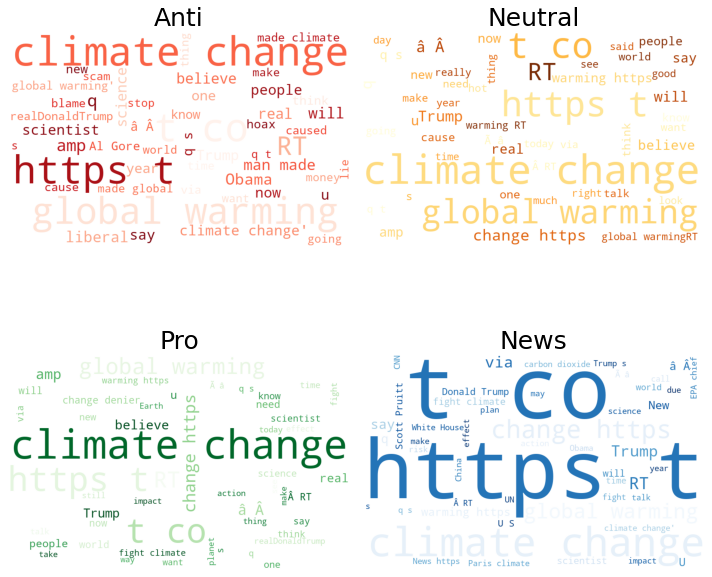

In [23]:
words = {
    "Anti": data[data["sentiment"] == -1]["message"],
    "Neutral": data[data["sentiment"] == 0]["message"],
    "Pro": data[data["sentiment"] == 1]["message"],
    "News": data[data["sentiment"] == 2]["message"]
    }

cmaps = {
    "Anti": ("Reds", 15),
    "Neutral": ("YlOrBr", 16),
    "Pro" : ("Greens", 23),
    "News": ("Blues", 42),
}

wordclouds = {}

for sentiment, (cmap, rand) in cmaps.items():
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=200, background_color="white",
        colormap=cmap,
        max_words=50
    ).generate("".join(words[sentiment]))

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.tight_layout()
plt.show()